In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загружаем результаты тестирования из файла "results.csv" в таблицу. Выбрасываем тесты, в которых путь не был найден. Для наглядности, выведем 10 случайных строк этой таблицы:

In [3]:
results_df = pd.read_csv("results.csv")
results_df.taskfile = results_df.taskfile.transform(lambda file: file[file.rfind('/') + 1:])
results_df = results_df[results_df.found == 1]
results_df.sample(10).sort_index()

,taskfile,width,height,obstaclesN,found,length,nodescreated,numberofsteps,searchtime
88,NewYork_2_256_50_3.xml,256,256,50,1,261,5855,4767,0.055120
1113,Sydney_1_512_200_4.xml,512,512,200,1,642,95954,58019,1.798500
1187,NewYork_0_512_20_3.xml,512,512,20,1,521,31131,27069,0.224587
1518,Milan_0_512_200_3.xml,512,512,200,1,521,75498,44742,2.422400
1825,Paris_2_512_500_2.xml,512,512,500,1,685,91208,48541,4.951360
1998,NewYork_1_512_1000_4.xml,512,512,1000,1,516,53336,20255,6.375140
2136,Milan_2_1024_50_2.xml,1024,1024,50,1,1191,240728,214212,2.962000
2200,NewYork_1_1024_20_1.xml,1024,1024,20,1,1311,176615,168725,1.537710
2606,NewYork_2_1024_100_0.xml,1024,1024,100,1,1451,141094,126289,2.377870
3084,Berlin_0_1024_1000_1.xml,1024,1024,1000,1,1110,342366,152691,32.935300


В следующей таблице представлены данные, сгруппированные по размеру карты и количеству динамических препятствий и далее усредненные по каждому из параметров (nodescreated - количество созданных состояний, numberofsteps - количество итераций алгоритма, searchtime - время работы алгоритма).

In [4]:
results_df.groupby(['width', 'obstaclesN']).mean()

height  found       length   nodescreated  numberofsteps  \
width obstaclesN                                                             
256   10           256.0    1.0   309.924658   13302.123288   11743.397260   
      20           256.0    1.0   320.979730   14195.074324   11757.932432   
      50           256.0    1.0   321.653061   17101.244898   12140.238095   
      100          256.0    1.0   313.527027   19803.364865   11551.878378   
      200          256.0    1.0   314.539568   22941.633094   11127.546763   
      500          256.0    1.0   313.360544   26909.979592   11794.149660   
      1000         256.0    1.0   315.751773   25407.078014   10857.205674   
512   10           512.0    1.0   636.791667   53405.798611   50093.243056   
      20           512.0    1.0   621.184932   52897.678082   47869.678082   
      50           512.0    1.0   626.699301   57997.587413   47249.874126   
      100          512.0    1.0   629.551020   66891.088435   47841.074830   
      200          512.0    1.0   621.554795   75408.773973   44971.404110   
      500          512.0    1.0   625.678082   95056.020548   44708.917808   
      1000         512.0    1.0   638.027211  105573.952381   44924.843537   
1024  10          1024.0    1.0  1263.287671  205771.041096  199206.643836   
      20          1024.0    1.0  1245.360544  196522.374150  186385.482993   
      50          1024.0    1.0  1267.452055  217644.979452  195046.527397   
      100         1024.0    1.0  1256.061224  236381.149660  195251.734694   
      200         1024.0    1.0  1256.172414  260931.337931  188187.358621   
      500         1024.0    1.0  1270.500000  355315.055556  200743.659722   
      1000        1024.0    1.0  1260.601351  395391.344595  188092.925676   

                  searchtime  
width obstaclesN              
256   10            0.078137  
      20            0.102426  
      50            0.194761  
      100           0.315197  
      200           0.552667  
      500           1.353528  
      1000          2.628422  
512   10            0.332825  
      20            0.395338  
      50            0.654447  
      100           1.148090  
      200           1.951233  
      500           4.748948  
      1000          9.851144  
1024  10            1.361761  
      20            1.626559  
      50            2.698910  
      100           4.496123  
      200           7.706426  
      500          19.817516  
      1000         36.674781

Чтобы проанализировать как зависит количество создающихся состояний (nodescreated) и время работы алгоритма от количества динамических препятствий, построим графики. Здесь на первом графике каждая кривая показывает зависимость усредненного числа созданных при работе алгоритма состояний среди тестов с картами одного размера от числа динамических препятствий на них. На втором - зависимость усредненного времени работы алгоритма среди тестов с картами одного размера от числа динамических препятствий.

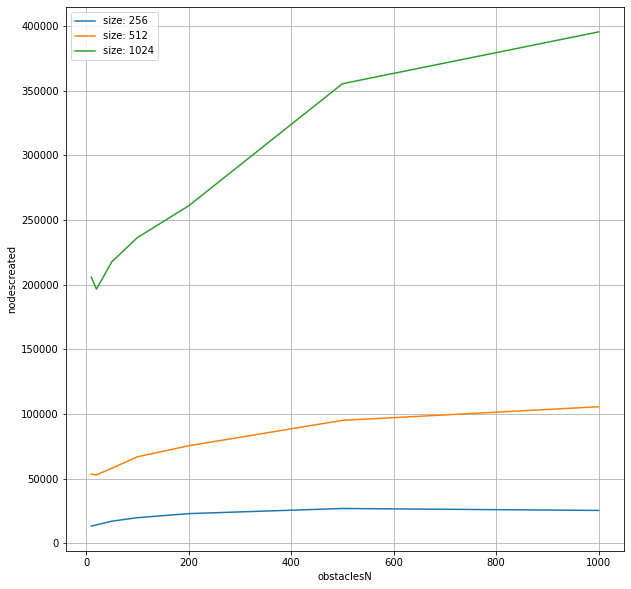

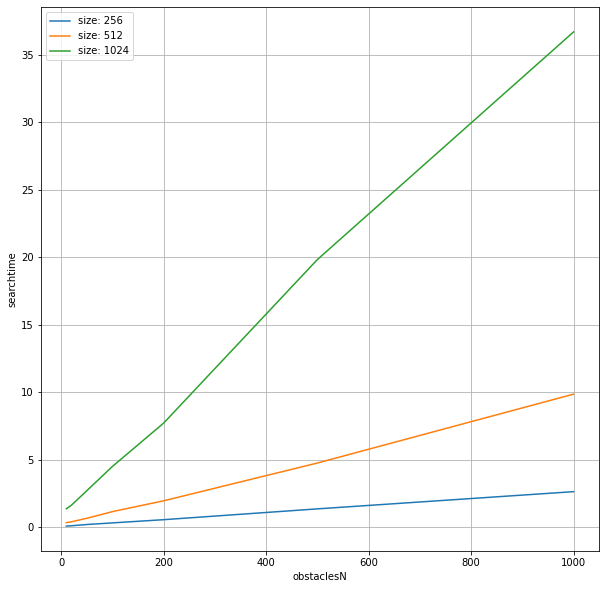

In [5]:
for trait in ['nodescreated', 'searchtime']:
    df256 = results_df[results_df.width == 256].groupby(['obstaclesN']).mean()[trait]
    df512 = results_df[results_df.width == 512].groupby(['obstaclesN']).mean()[trait]
    df1024 = results_df[results_df.width == 1024].groupby(['obstaclesN']).mean()[trait]
    df = pd.concat([df256, df512, df1024], axis=1, keys=['size: 256', 'size: 512', 'size: 1024'])
    df.plot(kind='line', figsize=(10, 10), ylabel=trait, legend=True, grid=True)


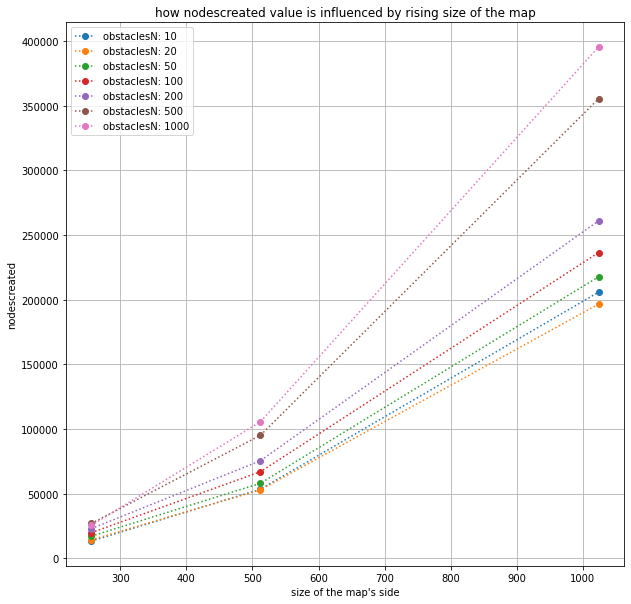

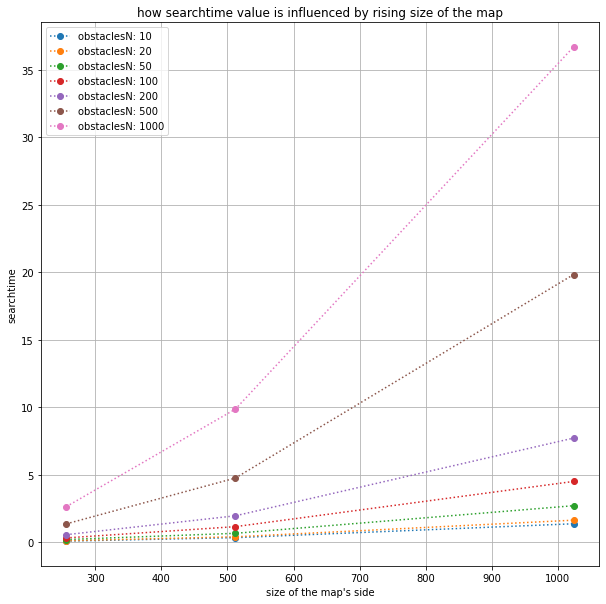

In [120]:
for trait in ['nodescreated', 'searchtime']:
    plt.figure(figsize=(10, 10))
    for obstaclesN in [10, 20, 50, 100, 200, 500, 1000]:
        df = results_df[results_df.obstaclesN == obstaclesN].groupby(['width']).mean()[trait]
        plt.plot(df.index, df.values, marker='o', ls=':', label="obstaclesN: " + str(obstaclesN))
    plt.xlabel("size of the map\'s side")
    plt.ylabel(trait)
    plt.title("how {} value is influenced by rising size of the map".format(trait))
    plt.legend()
    plt.grid()
    plt.show()